In [30]:
import gensim
import logging
import pandas as pd
from gensim.models import Word2Vec, KeyedVectors
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# use gensim==3.8, there is a problem when using intersect_word2vec_format in gensim==4.0 

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

TODO:
- fine tuning should be on the whole corpus, i.e. using both articles and comments
- should we remove stop words?

In [63]:
data_file = "../processed/comments.pkl"
df = pd.read_pickle(data_file)
df.head()

,comment
0,"I think that if you can, organic and local is ..."
1,Why am I not shocked ? lol
2,oh this is going to get good. But i will say t...
3,they are only talking about the general nutrie...
4,you took the words out of my mouth


In [64]:
sentences = df['comment'].astype('str').tolist()
print(len(sentences))
print(sentences[0])
tokenizer = RegexpTokenizer(r'\w+')
sentences_tokenized = [s.lower() for s in sentences]
sentences_tokenized = [tokenizer.tokenize(i) for i in sentences_tokenized]

53318
I think that if you can, organic and local is best


In [65]:
for i in range(5):
    print(sentences_tokenized[i])

['i', 'think', 'that', 'if', 'you', 'can', 'organic', 'and', 'local', 'is', 'best']
['why', 'am', 'i', 'not', 'shocked', 'lol']
['oh', 'this', 'is', 'going', 'to', 'get', 'good', 'but', 'i', 'will', 'say', 'this', 'my', 'first', 'husband', 'now', 'my', 'ex', 'worked', 'as', 'security', 'on', 'a', 'farm', 'in', 'nor', 'cal', 'one', 'row', 'was', 'organic', 'then', 'there', 'was', 'dirt', 'the', 'row', 'on', 'the', 'other', 'side', 'wasnt', 'yet', 'they', 'came', 'from', 'the', 'same', 'farm', 'i', 'love', 'to', 'edit', 'photos', 'and', 'make', 'siggys', 'pm', 'me', 'some', 'pics', 'and', 'what', 'you', 'want', 'on', 'it', 'and', 'i', 'will', 'make', 'you', 'more', 'then', 'one', 'to', 'choose', 'from']
['they', 'are', 'only', 'talking', 'about', 'the', 'general', 'nutrients', 'themselves', 'this', 'does', 'not', 'include', 'all', 'of', 'the', 'pesticides', 'antibiotics', 'gene', 'splicing', 'maybe', 'organic', 'is', 'not', 'fruits', 'and', 'veggies', 'do', 'not', 'have', 'a', 'higher', 

In [67]:
%%time
# processing with stop words and lemmatizing
lemmatize = True
remove_stop_word = False
if lemmatize:
    lemmatizer = WordNetLemmatizer()
if remove_stop_word:
    stop_words = set(stopwords.words('english'))
else:
    stop_words = None
sentences_step2 = []
for tokens in sentences_tokenized:
    if stop_words:
        tokens = [token for token in tokens if token not in stop_words]
    if lemmatize:
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
    sentences_step2.append(tokens)
print(sentences_step2[0:5])

[['i', 'think', 'that', 'if', 'you', 'can', 'organic', 'and', 'local', 'is', 'best'], ['why', 'am', 'i', 'not', 'shocked', 'lol'], ['oh', 'this', 'is', 'going', 'to', 'get', 'good', 'but', 'i', 'will', 'say', 'this', 'my', 'first', 'husband', 'now', 'my', 'ex', 'worked', 'a', 'security', 'on', 'a', 'farm', 'in', 'nor', 'cal', 'one', 'row', 'wa', 'organic', 'then', 'there', 'wa', 'dirt', 'the', 'row', 'on', 'the', 'other', 'side', 'wasnt', 'yet', 'they', 'came', 'from', 'the', 'same', 'farm', 'i', 'love', 'to', 'edit', 'photo', 'and', 'make', 'siggys', 'pm', 'me', 'some', 'pic', 'and', 'what', 'you', 'want', 'on', 'it', 'and', 'i', 'will', 'make', 'you', 'more', 'then', 'one', 'to', 'choose', 'from'], ['they', 'are', 'only', 'talking', 'about', 'the', 'general', 'nutrient', 'themselves', 'this', 'doe', 'not', 'include', 'all', 'of', 'the', 'pesticide', 'antibiotic', 'gene', 'splicing', 'maybe', 'organic', 'is', 'not', 'fruit', 'and', 'veggie', 'do', 'not', 'have', 'a', 'higher', 'nutrit

In [68]:
model = Word2Vec(size=300, min_count=5)
# model.build_vocab(sentences_tokenized)
model.build_vocab(sentences_step2)
total_examples = model.corpus_count

2021-05-03 00:01:51,598 : INFO : collecting all words and their counts
2021-05-03 00:01:51,599 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-05-03 00:01:51,753 : INFO : PROGRESS: at sentence #10000, processed 712286 words, keeping 23567 word types
2021-05-03 00:01:51,940 : INFO : PROGRESS: at sentence #20000, processed 1547202 words, keeping 33008 word types
2021-05-03 00:01:52,152 : INFO : PROGRESS: at sentence #30000, processed 2327286 words, keeping 42446 word types
2021-05-03 00:01:52,378 : INFO : PROGRESS: at sentence #40000, processed 3162538 words, keeping 48564 word types
2021-05-03 00:01:52,529 : INFO : PROGRESS: at sentence #50000, processed 3719389 words, keeping 52509 word types
2021-05-03 00:01:52,580 : INFO : collected 53916 word types from a corpus of 3919170 raw words and 53318 sentences
2021-05-03 00:01:52,581 : INFO : Loading a fresh vocabulary
2021-05-03 00:01:52,651 : INFO : effective_min_count=5 retains 16803 unique words (31% of o

In [69]:
# print example
print(model.wv.vectors.shape)   # model.wv.vectors == model.wv.syn0
# print(model.wv['organic'])
# print(model.wv.index2word[100], model.wv.vectors[100])
# before_example = model.wv['why']
# print(before_example)

# (59861, 300) for min_count=1
# (19160, 300) for min_count=5
# (16675, 300) for min_count=5 after stop_words and lemmatize
# (16803, 300) for min_count=5 after lemmatize

(16803, 300)


In [71]:
print(model.wv.vocab['organic'], model.wv.vocab['organic'].index)
print(model.wv.index2word[15])
print((model.wv.word_vec('organic') == model.wv.vectors[15]).all())
print((model.wv.get_vector('organic') == model.wv.word_vec('organic')).all())
print(list(model.wv.vocab)[:5])


Vocab(count:37156, index:15, sample_int:1830724641) 15
organic
True
True
['i', 'think', 'that', 'if', 'you']


In [74]:
# PCA should be run on the whole corpus?
def plot_pca_samples(model, word_list, fname=None):
    '''
    model: Word2Vec
    word_list: a list of words
    '''
    plt.figure(figsize=(15,15))
    idx = [model.wv.vocab[word].index for word in word_list]
    # X = model.wv[word_list]
    X = model.wv.vectors
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    result = result[idx]
    plt.scatter(result[:, 0], result[0:, 1])
    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))
    if fname:
        plt.savefig(fname)
    plt.show()

['came', 'from', 'same', 'love', 'edit', 'photo', 'make', 'pm', 'me', 'some', 'pic', 'what', 'want', 'it', 'more', 'choose', 'are', 'only', 'talking', 'about', 'general', 'nutrient', 'themselves', 'doe', 'include', 'all', 'of', 'pesticide', 'antibiotic', 'gene', 'splicing', 'maybe', 'fruit', 'veggie', 'do', 'have', 'higher', 'nutritional', 'value', 'sure', 'hell', 'safer', 'eat', 'mr', 'khan', 'took', 'word', 'out', 'mouth', 'exactly']


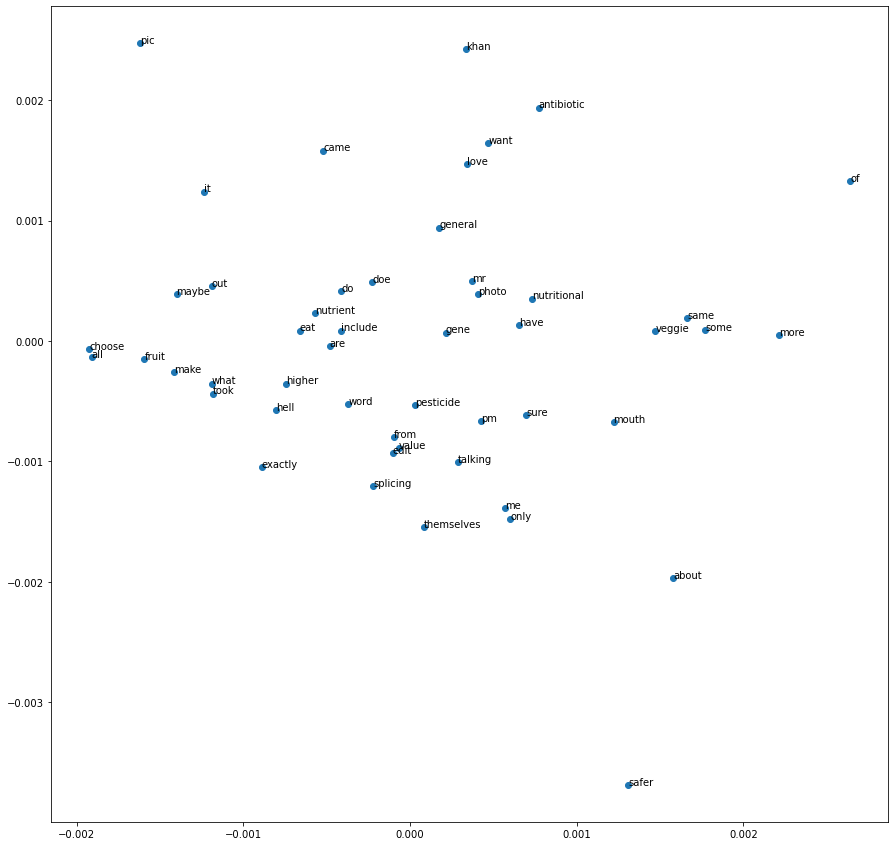

In [75]:
# plot after initialization
draw_vocab = list(model.wv.vocab)[50:100]
print(draw_vocab)
plot_pca_samples(model, draw_vocab)

In [76]:
%%time
# model_pretrained = KeyedVectors.load_word2vec_format("../wv/GoogleNews-vectors-negative300.bin.gz", binary=True)
# model.build_vocab([list(model_pretrained.vocab.keys())], update=True)     # why size of vocab remains the same?
model.intersect_word2vec_format('../wv/GoogleNews-vectors-negative300.bin.gz', binary=True, lockf=1.0)
# pre-trained word2vec models can be downloaded from https://code.google.com/archive/p/word2vec/

2021-05-03 00:03:21,644 : INFO : loading projection weights from ../wv/GoogleNews-vectors-negative300.bin.gz
2021-05-03 00:05:11,550 : INFO : merged 15432 vectors into (16803, 300) matrix from ../wv/GoogleNews-vectors-negative300.bin.gz
Wall time: 1min 49s


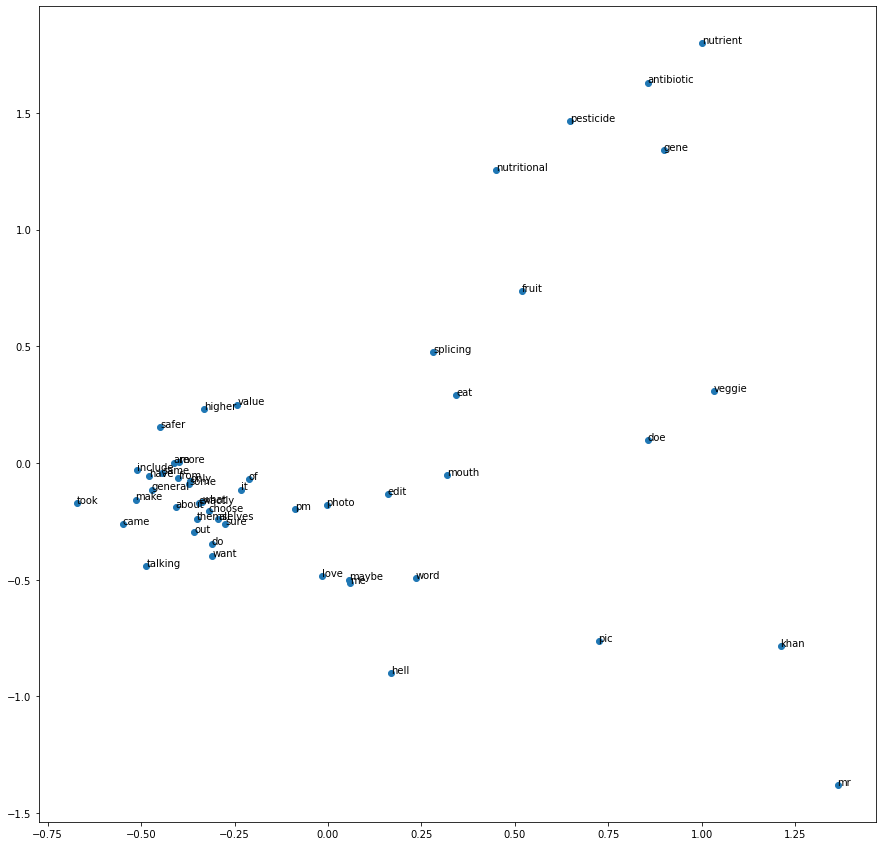

In [77]:
# see the difference between pre-trained model and initialization
plot_pca_samples(model, draw_vocab)

In [81]:
# TODO: use sentences_tokenized or sentences_step2 ???
# model.train(sentences_tokenized, total_examples=total_examples, epochs=5)
model.train(sentences_step2, total_examples=total_examples, epochs=20)

3 00:24:05,797 : INFO : EPOCH 5 - PROGRESS: at 65.38% examples, 406685 words/s, in_qsize 6, out_qsize 0
2021-05-03 00:24:06,810 : INFO : EPOCH 5 - PROGRESS: at 81.12% examples, 406856 words/s, in_qsize 5, out_qsize 0
2021-05-03 00:24:07,837 : INFO : EPOCH 5 - PROGRESS: at 98.87% examples, 406441 words/s, in_qsize 5, out_qsize 0
2021-05-03 00:24:07,872 : INFO : worker thread finished; awaiting finish of 2 more threads
2021-05-03 00:24:07,886 : INFO : worker thread finished; awaiting finish of 1 more threads
2021-05-03 00:24:07,902 : INFO : worker thread finished; awaiting finish of 0 more threads
2021-05-03 00:24:07,903 : INFO : EPOCH - 5 : training on 3919170 raw words (2913727 effective words) took 7.2s, 407100 effective words/s
2021-05-03 00:24:08,913 : INFO : EPOCH 6 - PROGRESS: at 16.04% examples, 407743 words/s, in_qsize 5, out_qsize 0
2021-05-03 00:24:09,928 : INFO : EPOCH 6 - PROGRESS: at 26.56% examples, 404905 words/s, in_qsize 5, out_qsize 0
2021-05-03 00:24:10,936 : INFO : E

(58276043, 78383400)

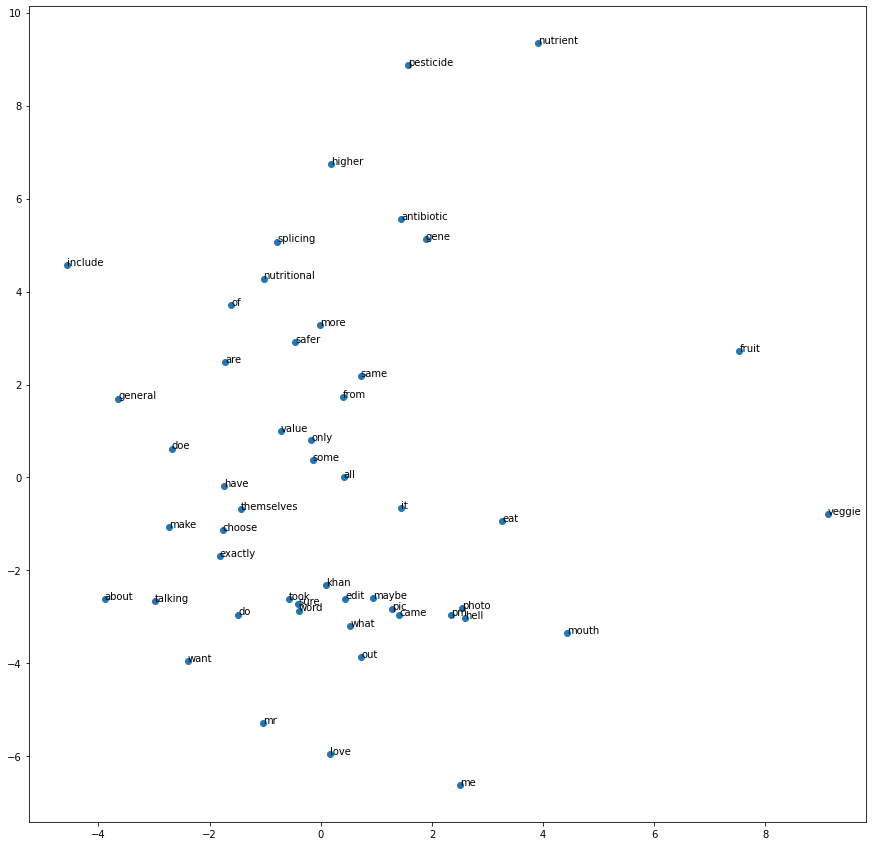

In [82]:
# see the difference between pre-trained and fine-tuning 
plot_pca_samples(model, draw_vocab, 'train_raw.png')

In [83]:
# save model, change the file names to indicate specific models
'''
_comment: text from comment
_raw: not trained on the corpus, pre-trained model
_trained: trained on the corpus
_stopword: without stopword
'''
# model.save("../wv/w2v_comment_raw.model")
model.save("../wv/w2v_comment_trained.model")
# model.save("../wv/w2v_comment_stopword_raw.model")
# model.save("../wv/w2v_comment_stopword_trained.model")

2021-05-03 00:28:11,760 : INFO : saving Word2Vec object under ../wv/w2v_comment_trained.model, separately None
2021-05-03 00:28:11,761 : INFO : not storing attribute vectors_norm
2021-05-03 00:28:11,762 : INFO : not storing attribute cum_table
2021-05-03 00:28:12,596 : INFO : saved ../wv/w2v_comment_trained.model
